<a href="https://colab.research.google.com/github/penny1xu/RESTS/blob/main/compare_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install censusgeocode
!pip install rets
import csv
import censusgeocode as cg
import numpy as np
from rets import Session
import datetime
import time
from datetime import datetime,timedelta
!pip install pytz
import matplotlib.pyplot as plt
import pytz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
login_url = 'https://ntrdd.mlsmatrix.com/rets/Login.ashx' 
username = '0671181_NID'
password = 'Rt$tg6jx'
rets_client = Session(login_url, username, password)
rets_client.login()


True

In [4]:
import time
from datetime import datetime, timedelta
tz_IN = pytz.timezone('US/Central')
today = datetime.now(tz_IN)
today_before_1year = today - timedelta(days=365)
dt_string = today_before_1year.strftime("%Y-%m-%d")

dt_string


'2021-06-16'

In [144]:
import datetime
data = '2021-07-13'
date = date.split("-")
d = datetime.date(int(date[0]),int(date[1]),int(date[2])).isocalendar()[1]
print(d)


28


In [13]:
# pull all the data which is satisfy the condition
import pandas as pd
import datetime

new_list = rets_client.search(resource = 'Property', resource_class='Property', dmql_query='(ListingContractDate = 2022-06-15+)')
lis = []
di ={}
df = pd.DataFrame()
for item in new_list:
  if(item['PropertyType'] == 'Residential' and item['PropertySubType'] == 'Single Family Residence'):
    df = pd.concat([df, pd.DataFrame(item.values())], axis=1, ignore_index=True) 
    di = item 
for key in di:
  lis.append(key)
df = df.T
df.columns = lis
new = len(df.index)

# get each date and sign to different week
df['ListingContractDate'] = pd.to_datetime(df['ListingContractDate'], errors='coerce')
df['week_number_of_year'] = df['ListingContractDate'].dt.isocalendar().week
# pull together different weeks' data
df['week_number_of_year'].value_counts()
week = df['week_number_of_year'].value_counts()
print(week[0])

#df.to_csv('data.csv')


KeyError: ignored

In [12]:
cls_list = rets_client.search(resource = 'Property', resource_class='Property',dmql_query='(CloseDate = 2022-06-15+)')
lis = []
di ={}
df = pd.DataFrame()
for item in cls_list:
  if(item['PropertyType'] == 'Residential' and item['PropertySubType'] == 'Single Family Residence'):
    df = pd.concat([df, pd.DataFrame(item.values())], axis=1, ignore_index=True) 
    di = item 
for key in di:
  lis.append(key)
df = df.T
df.columns = lis
close = len(df.index)

# get each date and sign to different week
df['CloseDate'] = pd.to_datetime(df['CloseDate'], errors='coerce')
df['week_number_of_year'] = df['CloseDate'].dt.isocalendar().week
# pull together different weeks' data
df['week_number_of_year'].value_counts()
print(df['week_number_of_year'].value_counts())

#df.to_csv('data.csv')



24    413
Name: week_number_of_year, dtype: Int64


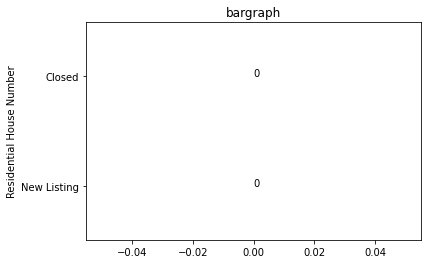

In [121]:
import matplotlib.pyplot as plt

# Define Data
weekends = ['Team 1','Team 2','Team 3','Team 4','Team 5']
newListing = [5, 10, 15, 20, 25]
closeDate = [15, 20, 30, 16, 13]

x_axis = np.arange(len(weekends))

# Multi bar Chart

plt.bar(x_axis -0.2, newListing, width=0.4, label = 'New Listing')
plt.bar(x_axis +0.2, closeDate, width=0.4, label = 'Close Date')

# Xticks

plt.xticks(x_axis, weekends)

# Add legend

plt.legend()

# Display

plt.show()